In [1]:
#Importing Required Libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv ')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Dropping the Customer ID column 

In [4]:
df=df.drop(["customerID"],axis=1)

In [5]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
# Checking the size of the dataset
df.shape

(7043, 20)

There are 7043 column and 20 rows in the dataset

In [7]:
# Checking columns names
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
# Checking the datatypes
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

There are object as well as float datatype.Total Charges are object datatype which is to be changed.

In [9]:
#Converting TotalCharges from object to float type data
df["TotalCharges"]=df["TotalCharges"].str.strip()
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [10]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


There are no null values in the dataset.

In [11]:
#Checking unique values of each column
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [12]:
#Checking unique values of target column
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

Target Variable Churn have two classes.

In [13]:
# Checking value count of each column for unexpected and unwanted entries.
for i in df.columns:
        print(df[i].value_counts())
        print('______________________________')

Male      3555
Female    3488
Name: gender, dtype: int64
______________________________
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
______________________________
No     3641
Yes    3402
Name: Partner, dtype: int64
______________________________
No     4933
Yes    2110
Name: Dependents, dtype: int64
______________________________
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
______________________________
Yes    6361
No      682
Name: PhoneService, dtype: int64
______________________________
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
______________________________
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
______________________________
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
____

In [14]:
#Grouping entries of MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies column

#Grouping in MultipleLines column
df["MultipleLines"].replace("No phone service","No",inplace=True)

#Grouping in OnlineSecurity column
df["OnlineSecurity"].replace("No internet service","No",inplace=True)

#Grouping in OnlineBackup column
df["OnlineBackup"].replace("No internet service","No",inplace=True)

#Grouping in DeviceProtection column
df["DeviceProtection"].replace("No internet service","No",inplace=True)

#Grouping in TechSupport column
df["TechSupport"].replace("No internet service","No",inplace=True)

#Grouping in StreamingTV column
df["StreamingTV"].replace("No internet service","No",inplace=True)

#Grouping in StreamingMovies column
df["StreamingMovies"].replace("No internet service","No",inplace=True)

In [15]:
#Checking for null values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 null values in the Total Charges 

In [16]:
#Replacing nan values of TotalCharges column by its mean
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())

In [17]:
#Checking null values 
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values in the dataset.

<AxesSubplot:>

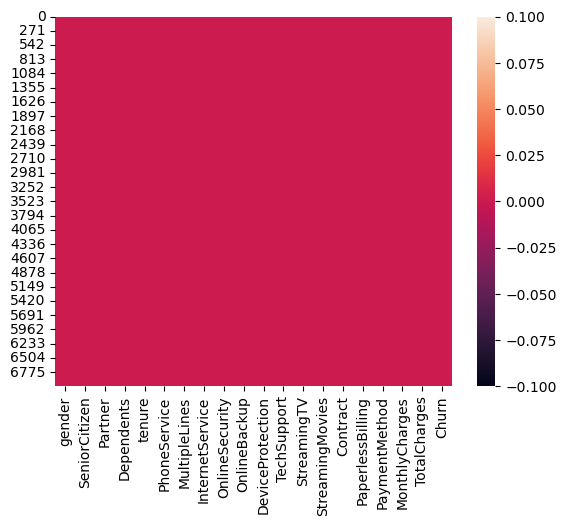

In [18]:
sns.heatmap(df.isnull())

In [19]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
print(f"Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print(f"Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns before dropping duplicates:  (7043, 20)
Rows and Columns after dropping duplicates:  (7021, 20)


Dropping the duplicate values in the dataset

In [21]:
df.describe(include="all")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7021,7021.000000,7021,7021,7021.000000,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021,7021.000000,7021.000000,7021
unique,2,NaN,2,2,NaN,2,2,3,2,2,2,2,2,2,3,2,4,NaN,NaN,2
top,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,3541,NaN,3619,4911,NaN,6339,4050,3090,5002,4592,4599,4977,4314,4289,3853,4161,2359,NaN,NaN,5164
mean,NaN,0.162512,NaN,NaN,32.469449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.851894,2290.342338,NaN
std,NaN,0.368947,NaN,NaN,24.534965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.069001,2265.044153,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.750000,411.150000,NaN
50%,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.400000,1410.250000,NaN
75%,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.900000,3801.700000,NaN


In [22]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7021,2,Male,3541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7021.0,NaN,NaN,NaN,0.162512,0.368947,0.0,0.0,0.0,0.0,1.0
Partner,7021,2,No,3619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7021,2,No,4911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7021.0,NaN,NaN,NaN,32.469449,24.534965,0.0,9.0,29.0,55.0,72.0
PhoneService,7021,2,Yes,6339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7021,2,No,4050,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7021,3,Fiber optic,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7021,2,No,5002,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7021,2,No,4592,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Checking the information of the dataset.

In [23]:
df.nunique().to_frame("Unique Values")

,Unique Values
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,2
InternetService,3
OnlineSecurity,2
OnlineBackup,2


Checking for the total number of unique values present in the dataset.

In [24]:
# checking for the names of all categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print('Categorical:',cat_col,'\n')

Categorical: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'] 



In [25]:
# checking the names of all numerical columns
num_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num_col.append(i)
print('Numerical:',num_col)

Numerical: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


Univariate Analysis.

No     5164
Yes    1857
Name: Churn, dtype: int64


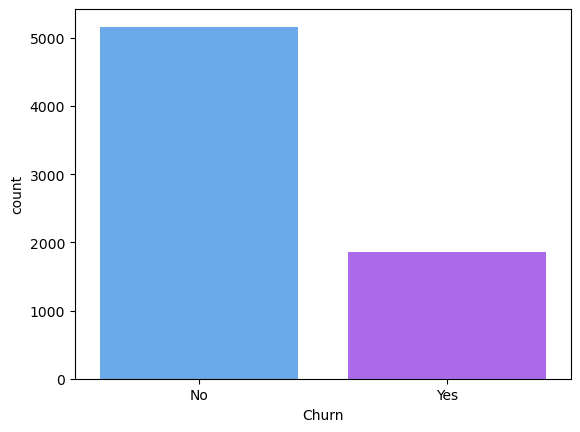

In [26]:
#Visualize the number of churned customers 
print(df["Churn"].value_counts())
sns.countplot(df["Churn"],palette="cool")
plt.show()

Findings-- 'No Chrun'are high then 'Yes Chrun'

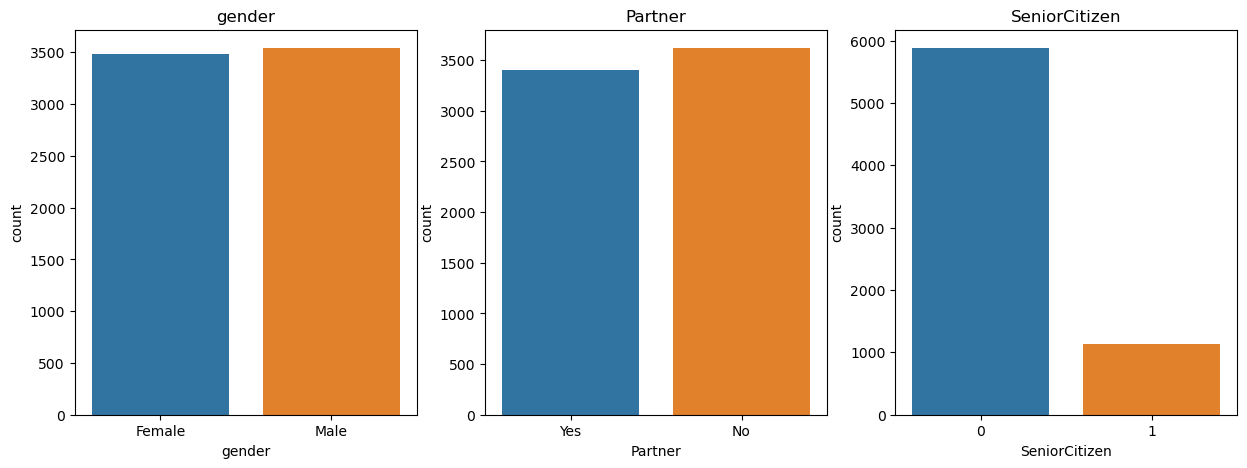

In [27]:
#Count plot for gender , Partner And Senior Citizen.
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.title('gender')
sns.countplot(df['gender'])
plt.subplot(1,3,2)
plt.title('Partner')
sns.countplot(df['Partner'])
plt.subplot(1, 3, 3)
plt.title('SeniorCitizen')
sns.countplot(df['SeniorCitizen'])
plt.show()

In Gender and Partner have the same count .Senior Citizen are in low number.

No     4911
Yes    2110
Name: Dependents, dtype: int64


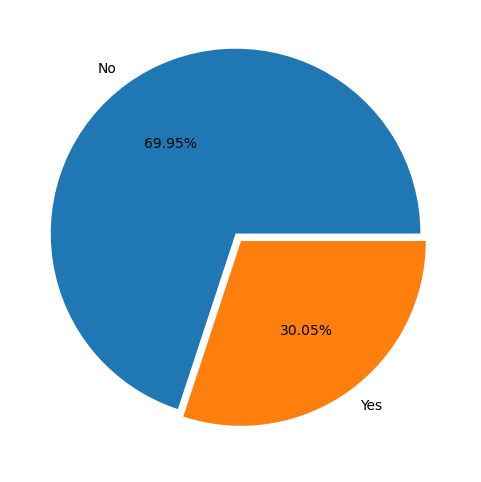

In [28]:
#Visualize the count of Gender
print(df['Dependents'].value_counts())
labels='No','Yes'
fig, ax = plt.subplots(figsize=(6,6))
colors=["tab:green","darkorange"]
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=False,explode=(0.05,0))
plt.show()

Findings--69.95% of customers have no dependents and 30.35% have dependants.

Yes    6339
No      682
Name: PhoneService, dtype: int64


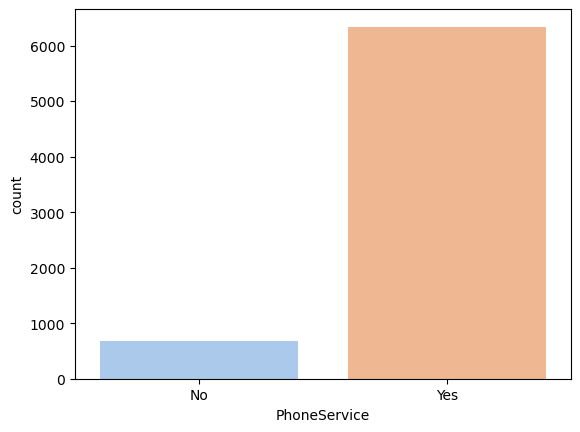

In [29]:
#Visualizing how many customers have Phone Service
print(df["PhoneService"].value_counts())
sns.countplot(df["PhoneService"],palette="pastel")
plt.show()

The customers who have phone services are more then who do not own phone services.

No     4050
Yes    2971
Name: MultipleLines, dtype: int64


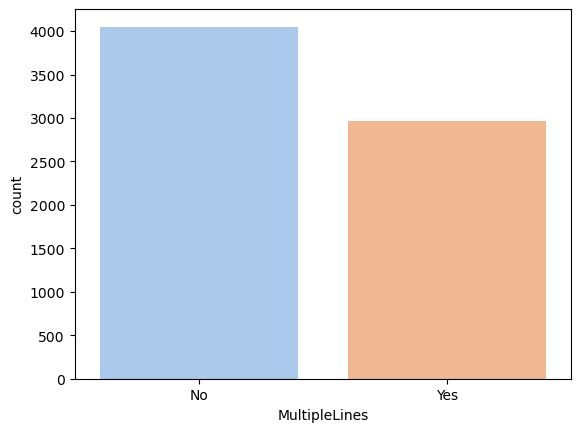

In [30]:
#Visualizing count of multiple lines
print(df["MultipleLines"].value_counts())
sns.countplot(df["MultipleLines"],palette="pastel")
plt.show()

"No" in MultipleLines are more than "Yes"

Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64


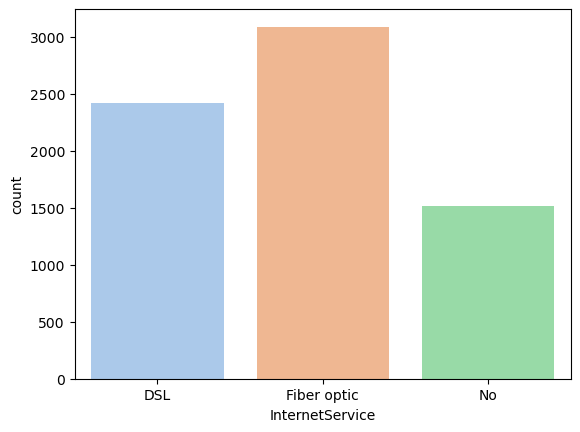

In [31]:
#Visualizing for Internet services
print(df["InternetService"].value_counts())
sns.countplot(df["InternetService"],palette="pastel")
plt.show()

Fiber optic internet service customer are more followed by DSL,customers who do not have an internet service are also seen.

No     5002
Yes    2019
Name: OnlineSecurity, dtype: int64


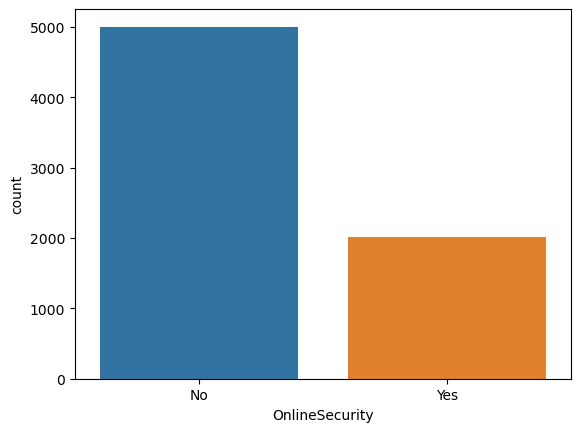

In [32]:
#Visualizing for OnlineSecurity
print(df["OnlineSecurity"].value_counts())
sns.countplot(df["OnlineSecurity"])
plt.show()

Findings--Majority of customers have internet services but they do not use any online security.

No     4592
Yes    2429
Name: OnlineBackup, dtype: int64


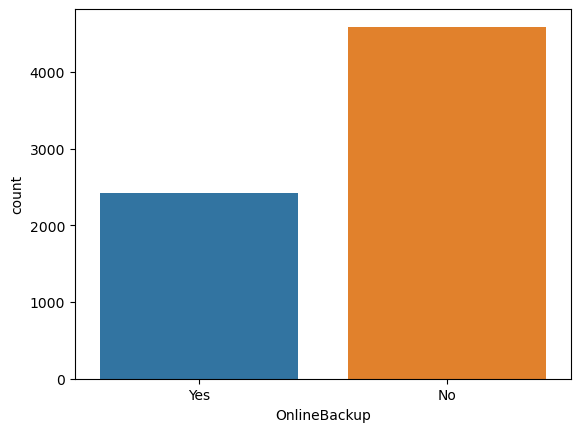

In [33]:
#Visualizing for Online backup
print(df["OnlineBackup"].value_counts())
sns.countplot(df["OnlineBackup"])
plt.show()

Findings--cCounts of customers without online backup is more.

No     4599
Yes    2422
Name: DeviceProtection, dtype: int64


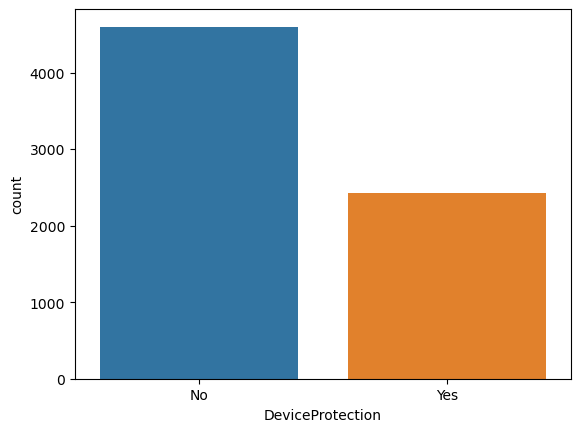

In [34]:
#Visualizing for  DeviceProtection 
print(df["DeviceProtection"].value_counts())
sns.countplot(df["DeviceProtection"])
plt.show()

Findings-- There are more customers with no device protection

No     4977
Yes    2044
Name: TechSupport, dtype: int64


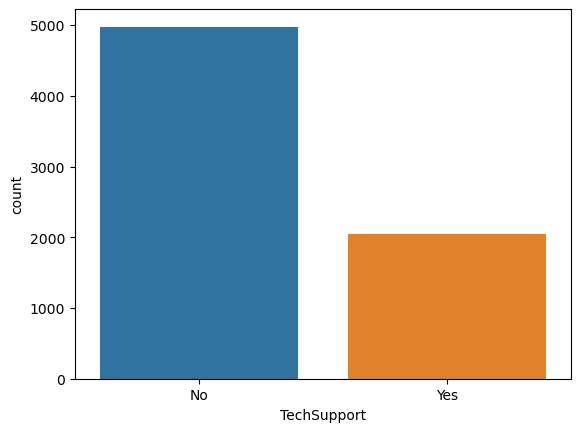

In [35]:
#Visualizing for TechSupport
print(df["TechSupport"].value_counts())
sns.countplot(df["TechSupport"])
plt.show()

Findings-- There are more customers with no tech support.

No     4314
Yes    2707
Name: StreamingTV, dtype: int64


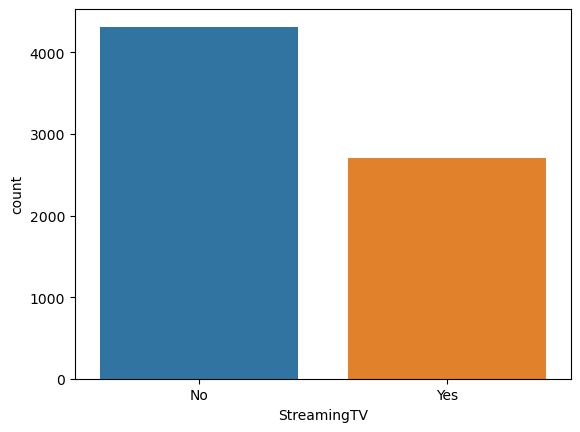

In [36]:
#Visualizing for StreamingTV
print(df["StreamingTV"].value_counts())
sns.countplot(df["StreamingTV"])
plt.show()

Findings--Most of the customers do not have tv streaming

No     4289
Yes    2732
Name: StreamingMovies, dtype: int64


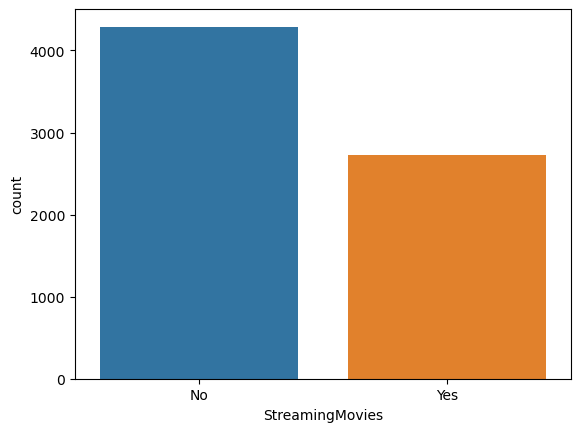

In [37]:
#Visualizing for StreamingMovies
print(df["StreamingMovies"].value_counts())
sns.countplot(df["StreamingMovies"])
plt.show()

Findings-- Most of the customers do not have StreamingMovies.

Month-to-month    3853
Two year          1695
One year          1473
Name: Contract, dtype: int64


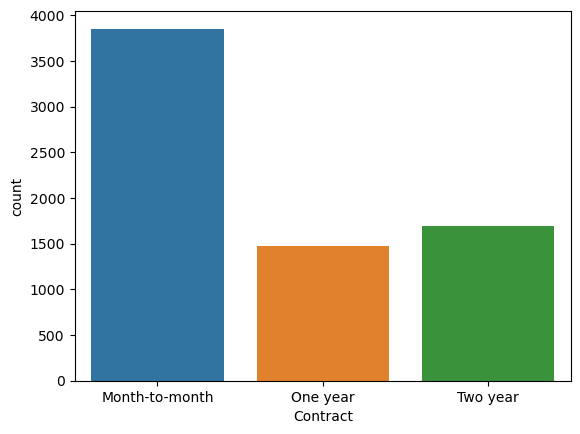

In [38]:
#Visualizing for Contract
print(df["Contract"].value_counts())
sns.countplot(df["Contract"])
plt.show()

Findings--Month to Month contract customers are more compared to 1 year and 2 years contract.

Yes    4161
No     2860
Name: PaperlessBilling, dtype: int64


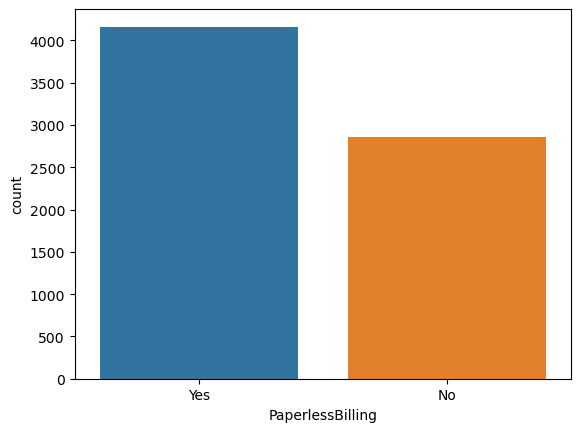

In [39]:
#Visualizing for PaymentMethod
print(df["PaperlessBilling"].value_counts())
sns.countplot(df["PaperlessBilling"])
plt.show()

In [ ]:
Findings--Customers prefering paperless billing are more.

Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


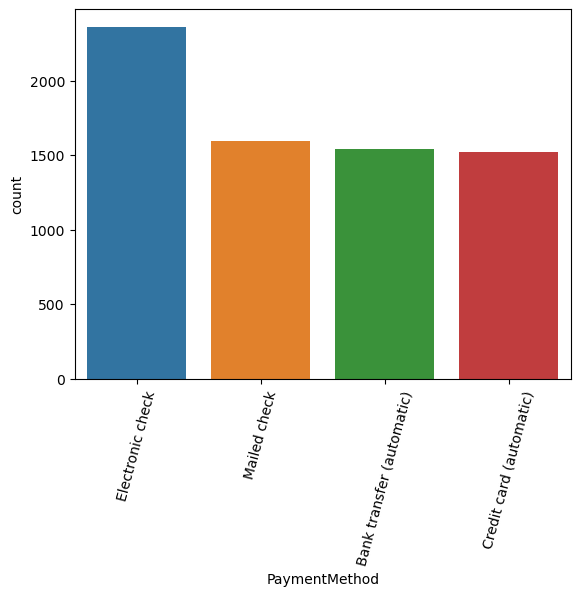

In [40]:
#Visualizing for Contract
print(df["PaymentMethod"].value_counts())
sns.countplot(df["PaymentMethod"])
plt.xticks(rotation=75)
plt.show()

Findings--Customer use Electronic check payment method more followed by customers who prefer Mailed Check, bank transfer and Credit card are average in count.

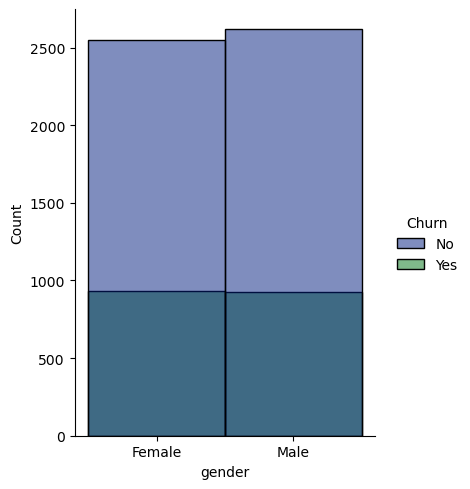

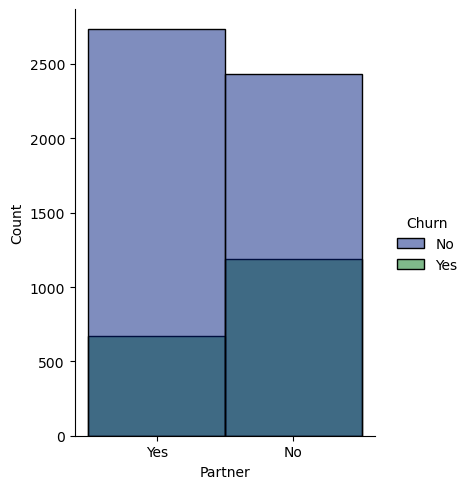

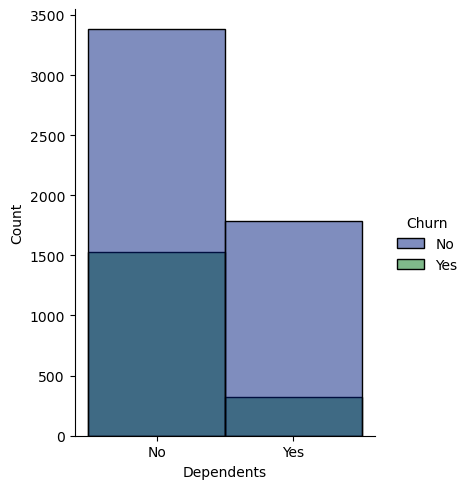

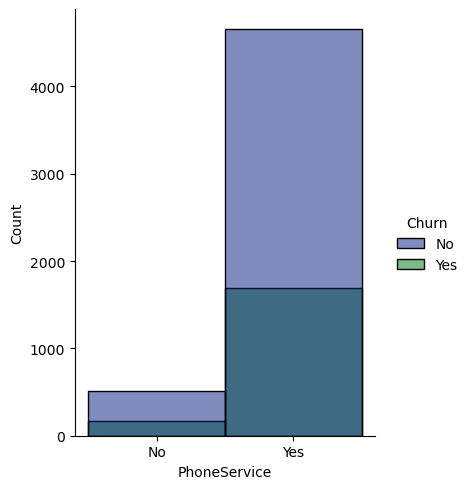

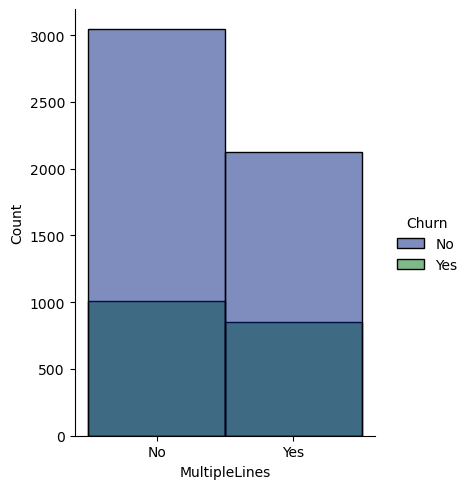

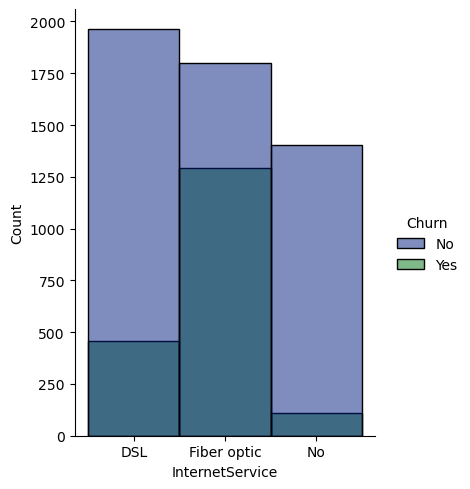

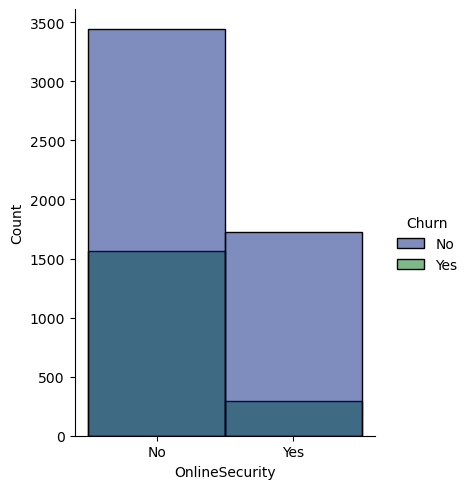

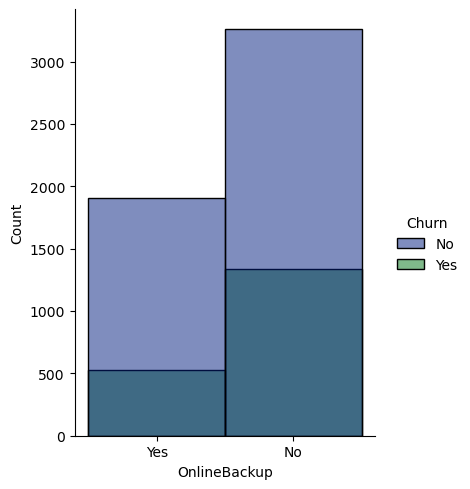

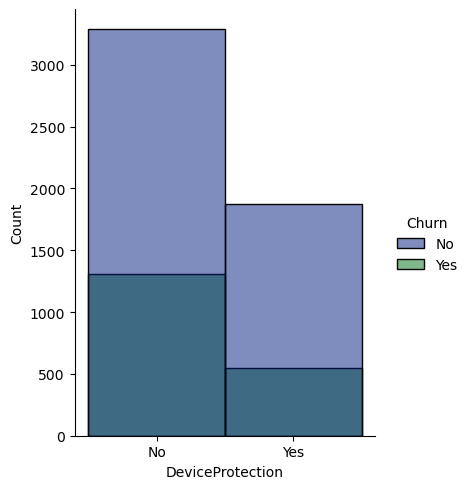

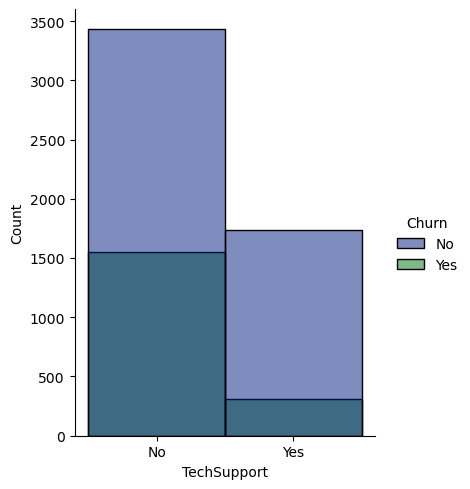

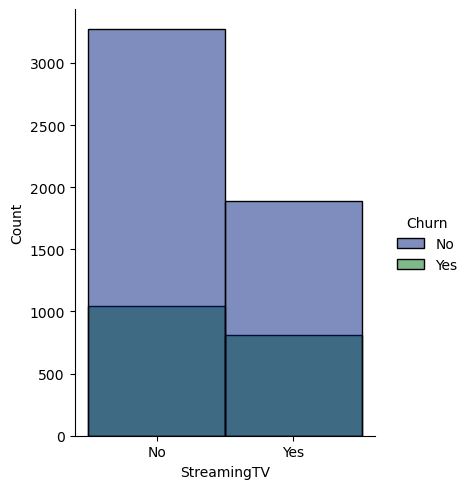

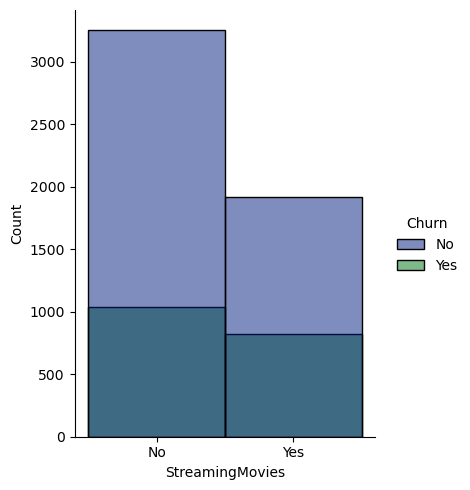

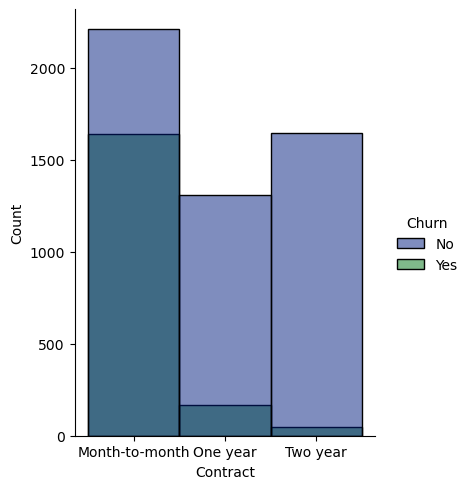

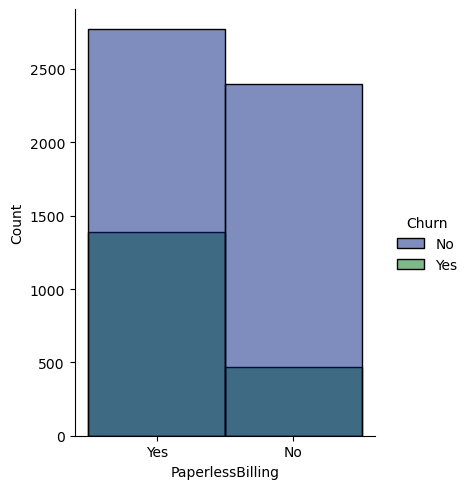

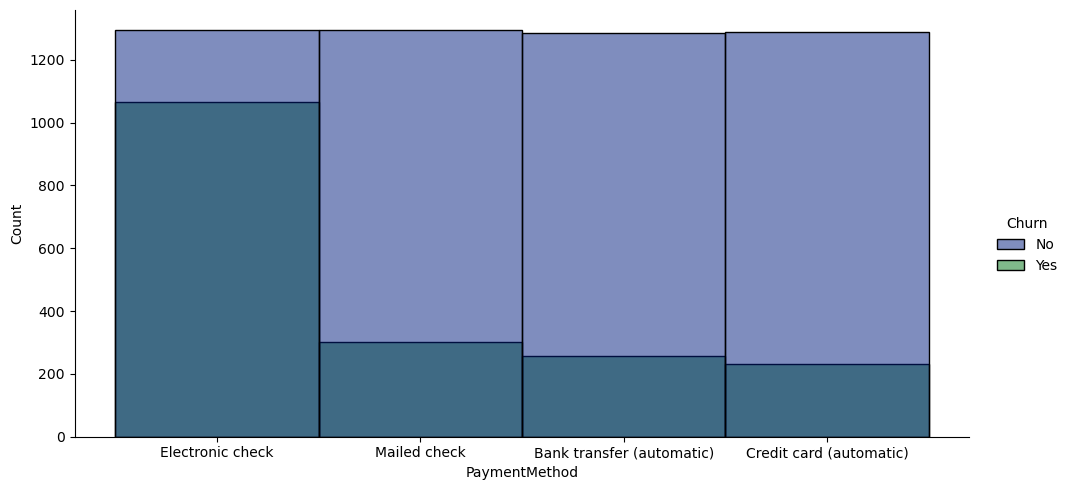

In [41]:
plt.style.use('seaborn-dark-palette')

new_data=cat_col
new_data.remove('Churn')
new_list=new_data
for col in new_list:
    if col=='PaymentMethod':
        aspect_ratio=2.0
    else:
        aspect_ratio=0.8
    sns.displot(x=col, hue='Churn', data=df, element="bars", aspect=aspect_ratio)

'Yes Chrun' option has been normal less than 'No Chrun'.

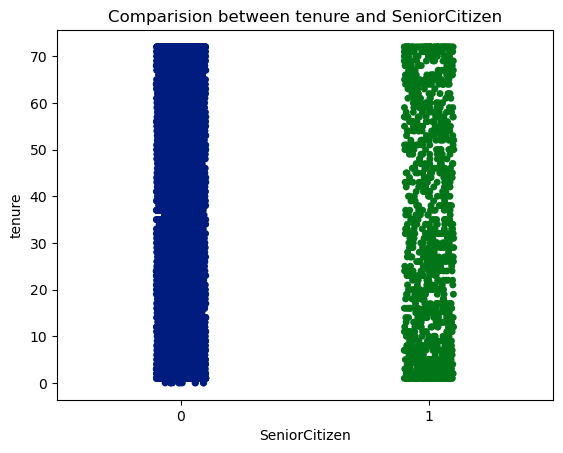

In [42]:
#Comparison between tenure and SeniorCitizen 
plt.title("Comparision between tenure and SeniorCitizen")
sns.stripplot( x = "SeniorCitizen",y = "tenure", data = df)
plt.show()

In [ ]:
There is no difference between the Tenure and Senior Citizen

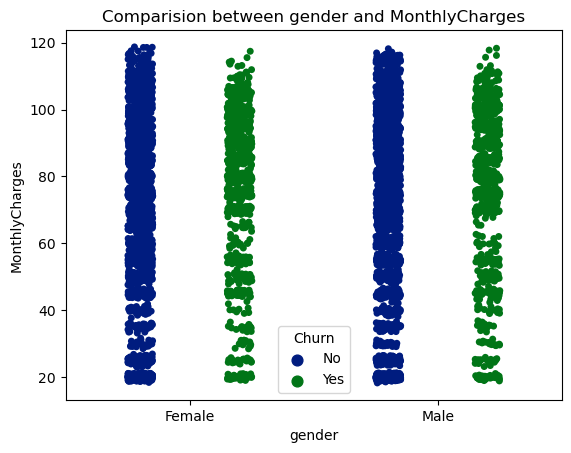

In [43]:
#Comparison between gender and MonthlyCharges 
plt.title("Comparision between gender and MonthlyCharges")
sns.stripplot( x = "gender",y = "MonthlyCharges", data = df,hue="Churn",split=True)
plt.show()

Findings--Male and female customers with monthly charges above 70 have high chances of getting churned

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

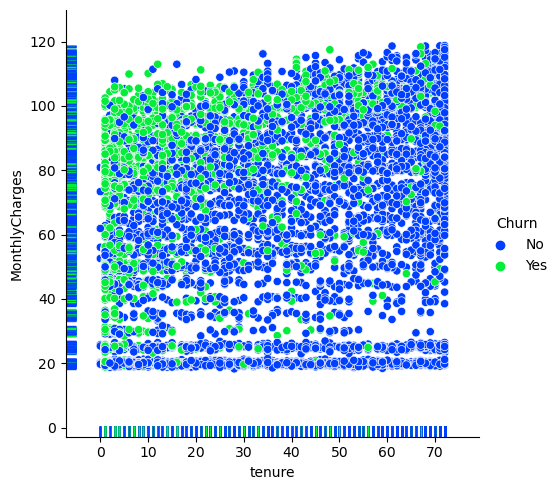

In [44]:
plt.style.use('default')
plt.style.use('seaborn-bright')

sns.relplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', legend=False)

Findings--People in the initial months of service usage have more possibilty to discontinue the service offered so there is strong retension on those phase are required.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

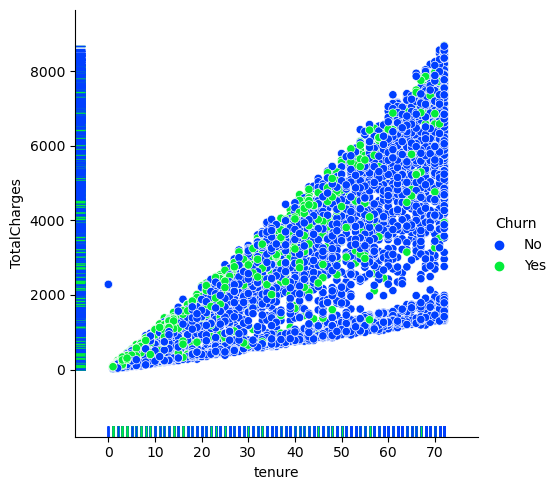

In [45]:
sns.relplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
sns.rugplot(data=df, x='tenure', y='TotalCharges', hue='Churn', legend=False)

Findings--Tenure increases the total charge also increase and if people have chosen to spend a high tenure using the service then the churn criteria is low or negligible.

<AxesSubplot:xlabel='TotalCharges', ylabel='MonthlyCharges'>

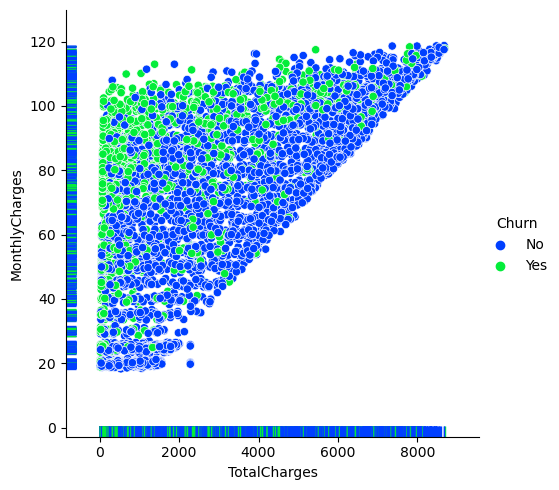

In [46]:
sns.relplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn')
sns.rugplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', legend=False)

Findings-- People with high monthly charges tend to leave the service and are not able to contribute much to the total charges. Similarly if a customer has chosen to stick around with the reasonable monthly charges then there is a steep increase with the total charges as well.

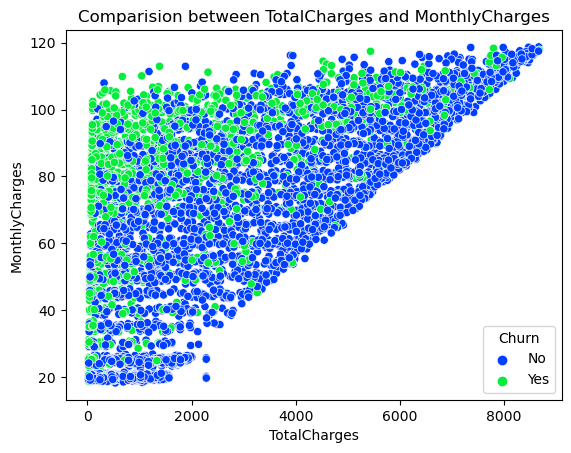

In [47]:
#Comparison between TotalCharges and MonthlyCharges 
plt.title("Comparision between TotalCharges and MonthlyCharges")
sns.scatterplot( x = "TotalCharges",y = "MonthlyCharges", data = df,hue="Churn")
plt.show()

Findings--The customers with high monthly charges have high tendancy to stop the services.The customers ready to contribute with the monthly charges then there is an increment in the total charges.

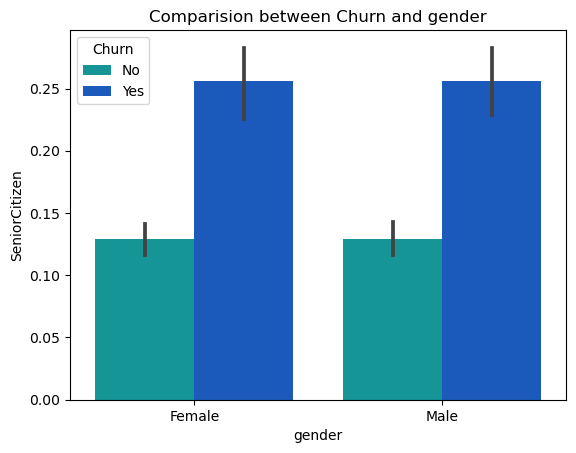

In [48]:
#Comparison between  gender and SeniorCitizen on the basis of churn
plt.title("Comparision between Churn and gender")
sns.barplot( x = "gender",y = "SeniorCitizen", data = df,palette="winter_r",hue="Churn")
plt.show()

Findings--There is no much difference between the features. The customer's churns remains unaffected in gender and SeniorCitizen case.

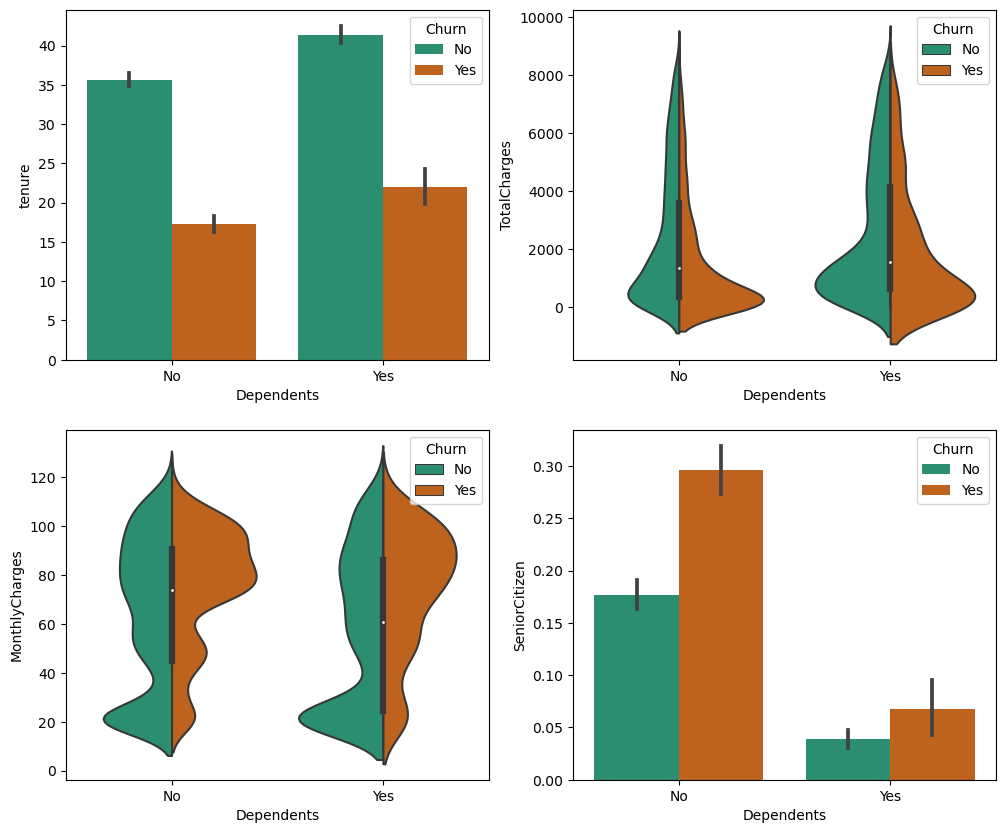

In [49]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking Churn level in tenure
sns.barplot(x='Dependents',y='tenure',ax=axes[0,0],data=df,palette="Dark2",hue="Churn")

# Checking Churn level in TotalCharges
sns.violinplot(x='Dependents',y='TotalCharges',ax=axes[0,1],data=df,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in MonthlyCharges
sns.violinplot(x='Dependents',y='MonthlyCharges',ax=axes[1,0],data=df,palette="Dark2",hue="Churn",split=True)

# Checking Churn level in SeniorCitizen
sns.barplot(x='Dependents',y='SeniorCitizen',ax=axes[1,1],data=df,palette="Dark2",hue="Churn")
plt.show()

Findings--
1. The customers who have dependents with high tenure, then the churned level is high 80-110.
2.The customers who have total charges in the range of 0-2000 with dependents then the chance of getting churned is high.
3.The customers having Monthly charges between 80-110 with dependents have high churn rate and when the customers have no dependents and having monthly charges around 20 then the ratio of churn is very high.
4.If the customer is a senior citizen and have no dependents then there is a tendancy of getting churned.

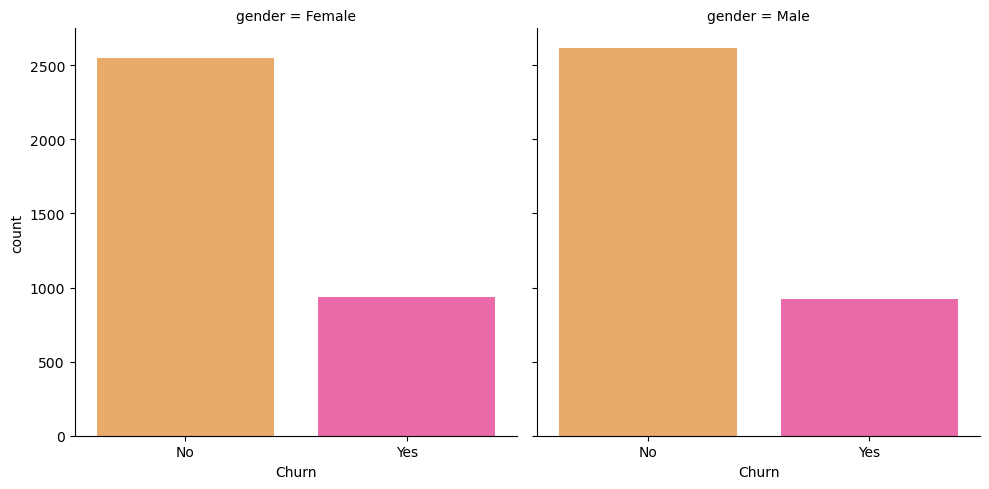

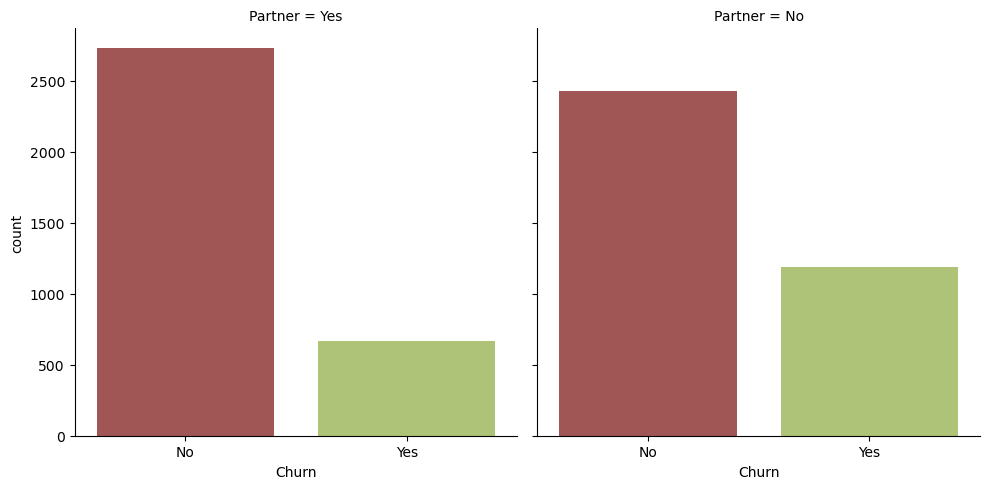

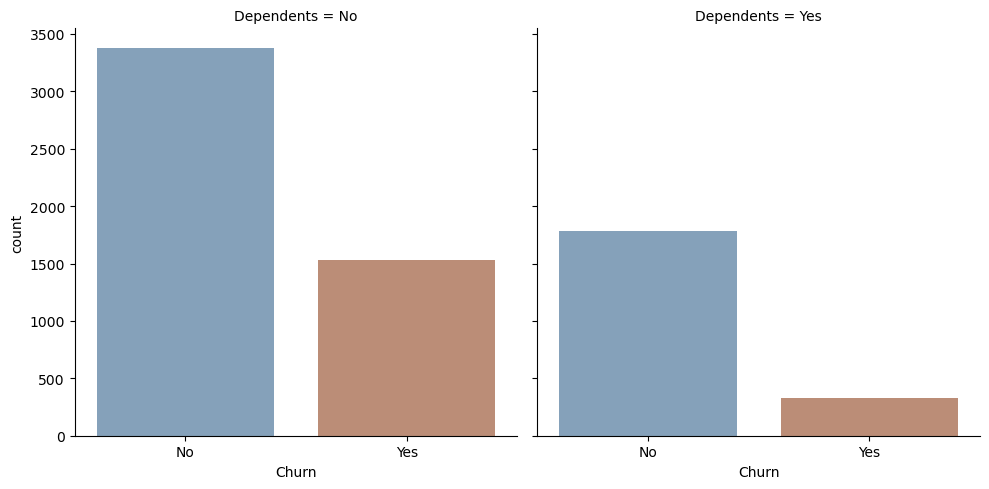

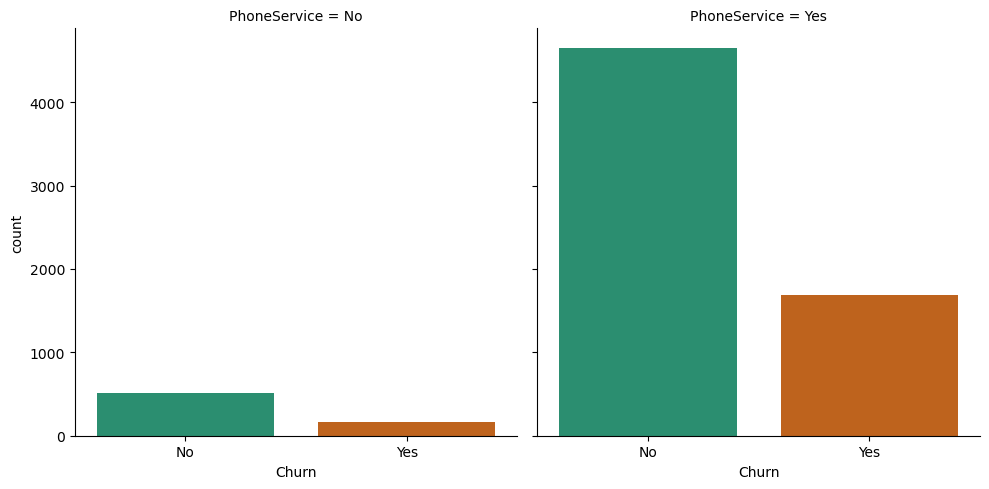

In [50]:
# Checking Churn level and gender
sns.catplot(x='Churn',col='gender',data=df,kind="count",palette="spring_r")

# Checking Churn level and Partner
sns.catplot(x='Churn',col='Partner',data=df,palette="tab20b_r",kind="count")

# Checking Churn level in Dependents
sns.catplot(x='Churn',col='Dependents',data=df,palette="twilight_shifted",kind="count")

# Checking Churn level in PhoneService
sns.catplot(x='Churn',col='PhoneService',data=df,palette="Dark2",kind="count")
plt.show()

Findings--
1.There is no much difference in the genders, both the genders have equal churn level.
2.The customers without partners have high churn rate compared to the customers with partners.
3.The customers who do not have any dependency have high churn rate then the customers who have dependents.
4.The customers who have phone service have high tendency of getting churned.

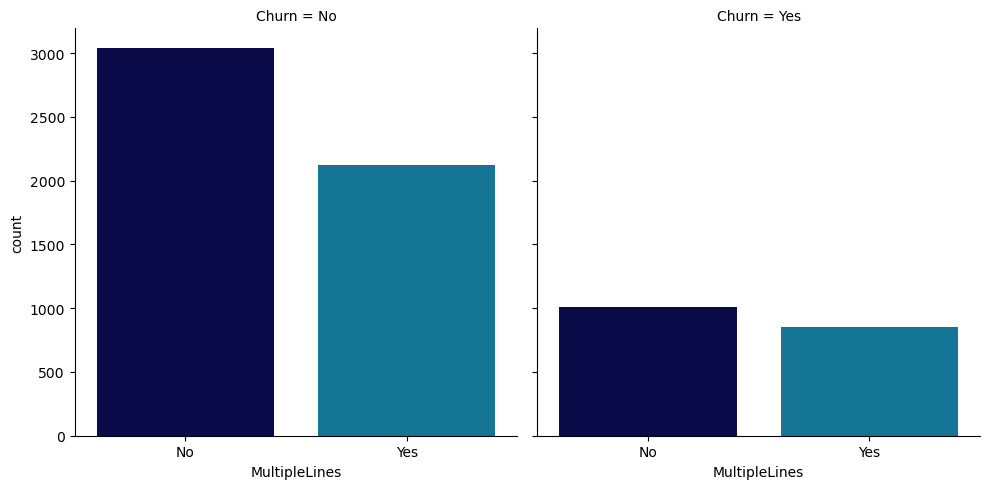

In [51]:
# Checking Churn level and MultipleLines
sns.catplot(x= 'MultipleLines',col='Churn',palette="ocean",kind="count",data=df)
plt.show()

Findings--
1.The customers who have phone services from single line have high churn rate then the customers having phone services from multiple lines.
2.There are very less number of customers who do not have phone services.

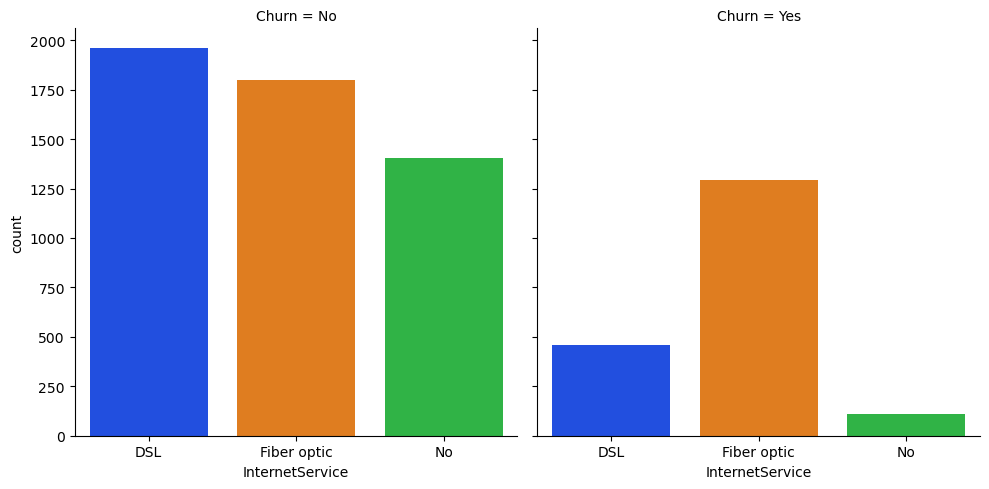

In [52]:
# Checking Churn level in InternetService
sns.catplot(x='InternetService',col='Churn',palette="bright",kind="count",data=df)
plt.show()

Findings--
1.The ratio of churn is high when the customers prefer Fiber optic internet services then the other services.
2.Customers who own DSL service they have very less churn rate.

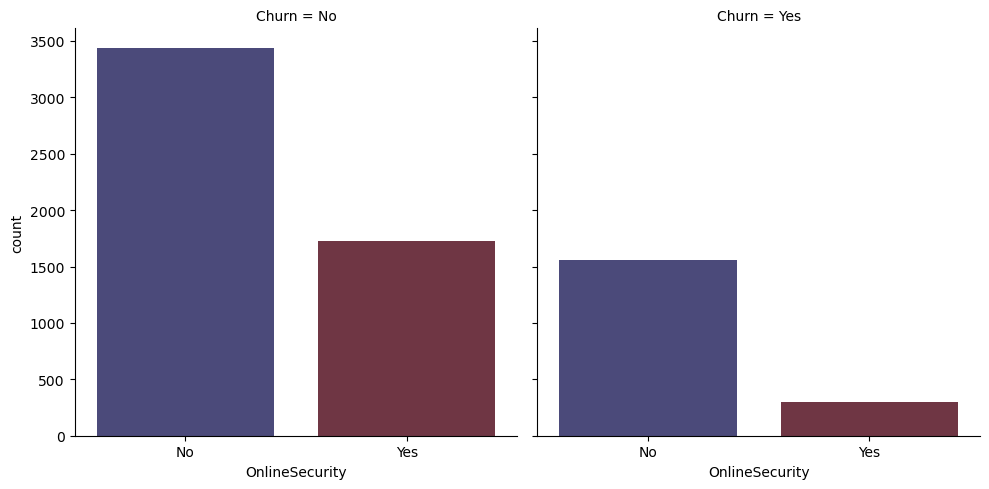

In [53]:
# Checking Churn level in OnlineSecurity
sns.catplot(x='OnlineSecurity',col='Churn',palette="icefire",kind="count",data=df)
plt.show()

Findings--The customers who have no internet service have very less churn rate and the customers who do not have online security services have high tendency to getting churned.

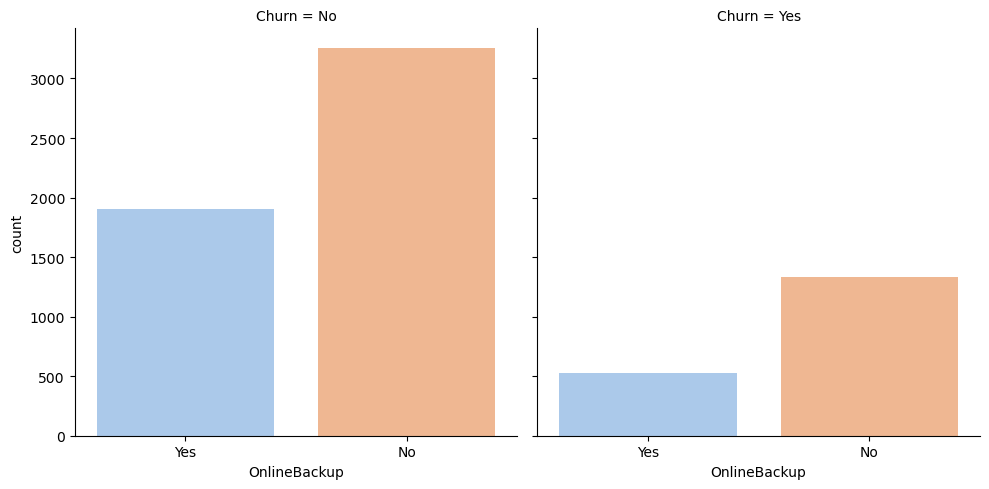

In [54]:
# Checking Churn level in OnlineBackup
sns.catplot(x='OnlineBackup',col='Churn',palette="pastel",kind="count",data=df)
plt.show()

Findings--
1.The customers who do not have internet services they do not need any online backup. 
2.The customers who do not have online backup services they have high churn rate.

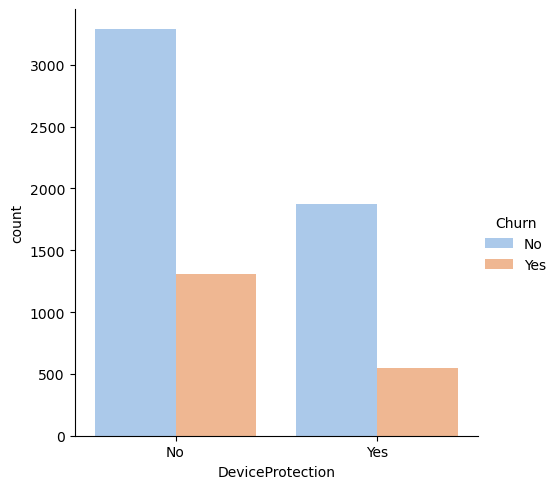

In [55]:
# Checking Churn level in DeviceProtecion
sns.catplot(x='DeviceProtection',hue='Churn',palette="pastel",kind="count",data=df)
plt.show()

Findings--The customers who do not own any Device protection have very high churn rate compared to others.

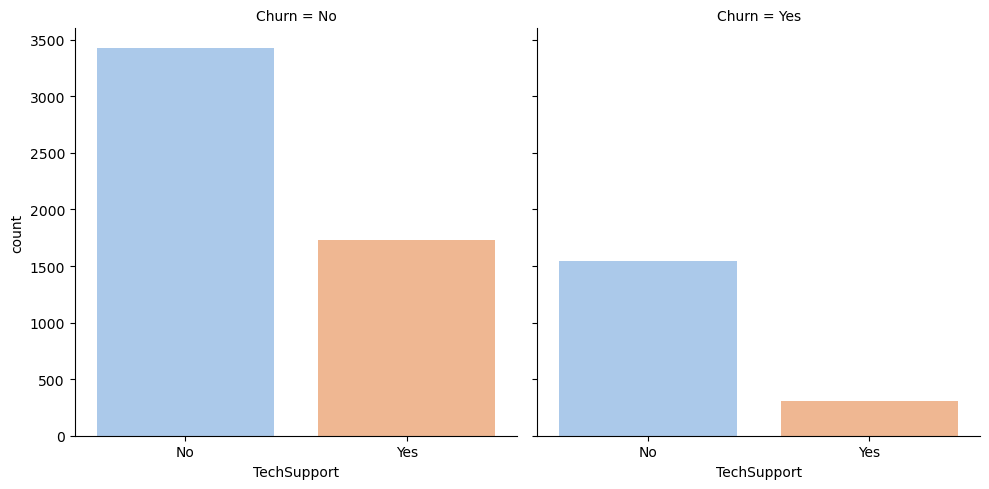

In [56]:
# Checking Churn level in TechSupport
sns.catplot(x='TechSupport',col='Churn',palette="pastel",kind="count",data=df)
plt.show()

Findings--The customers who have No Tech Support have high churn rate

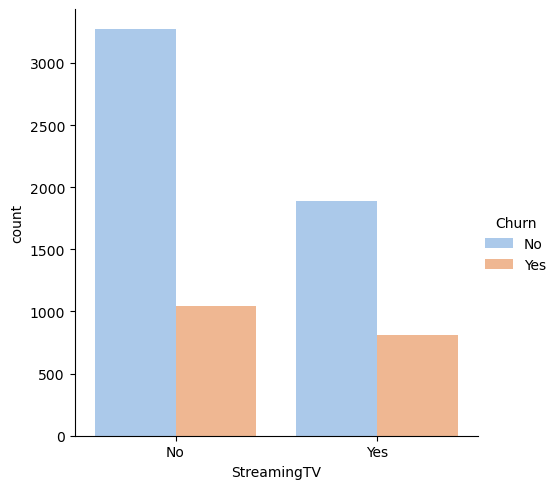

In [57]:
# Checking Churn level in StreamingTV
sns.catplot(x='StreamingTV', hue='Churn', palette="pastel", kind="count", data=df)
plt.show()

Findings--Churn rate is nearly same if the customer own StreamingTV or not

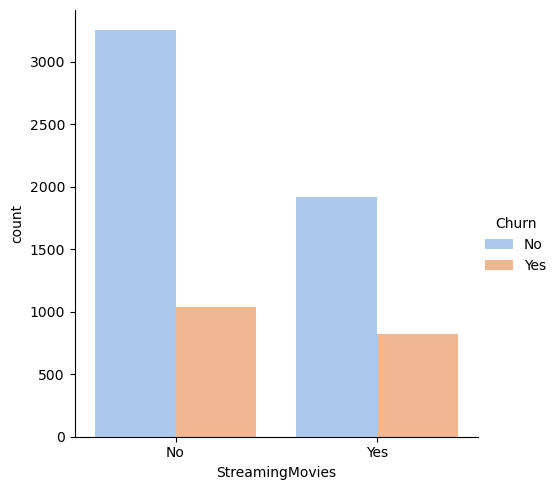

In [58]:
# Checking Churn level in StreamingMovies
sns.catplot(x='StreamingMovies',hue='Churn',palette="pastel",kind="count",data=df)
plt.show()

Findings--The customers who do not have StreamingMovies have high churn rate.

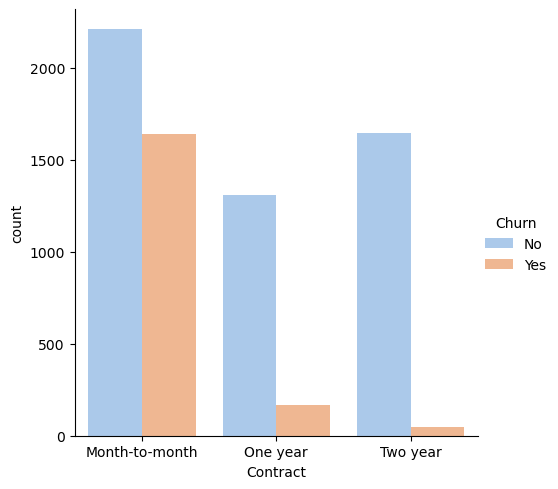

In [59]:
# Checking Churn level in Contract
sns.catplot(x='Contract',hue='Churn',palette="pastel",kind="count",data=df)
plt.show()

Findings--The customers who have churned are mostly having month to month contract.

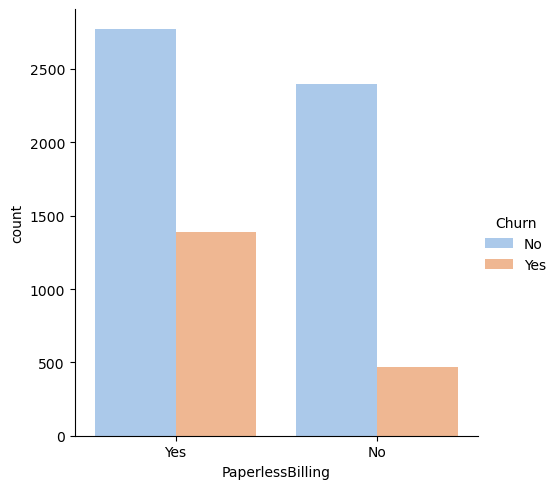

In [60]:
# Checking Churn level in PaperlessBilling
sns.catplot(x='PaperlessBilling',hue='Churn',palette="pastel",kind="count",data=df)
plt.show()

Findings--The customers who prefer paperless billing they have high churn rate

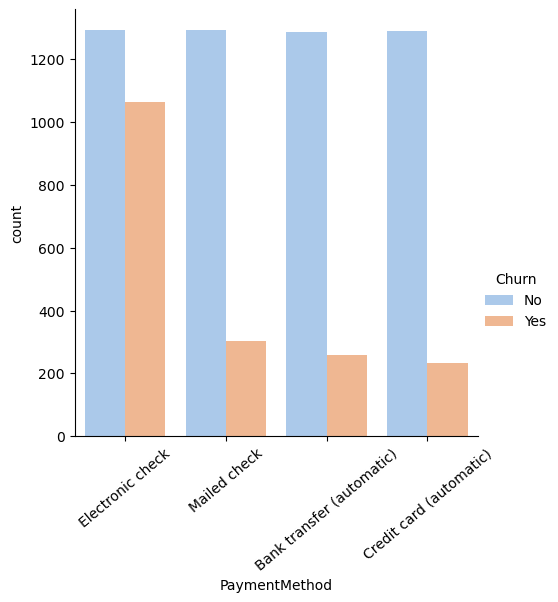

In [61]:
# Checking Churn level in PaymentMethod
sns.catplot(x='PaymentMethod',hue='Churn',palette="pastel",kind="count",data=df)
plt.xticks(rotation=40)
plt.show()

Findings--"Electronic check" payment have higher churn rate compared to other types of payments.

Multivariate Analysis

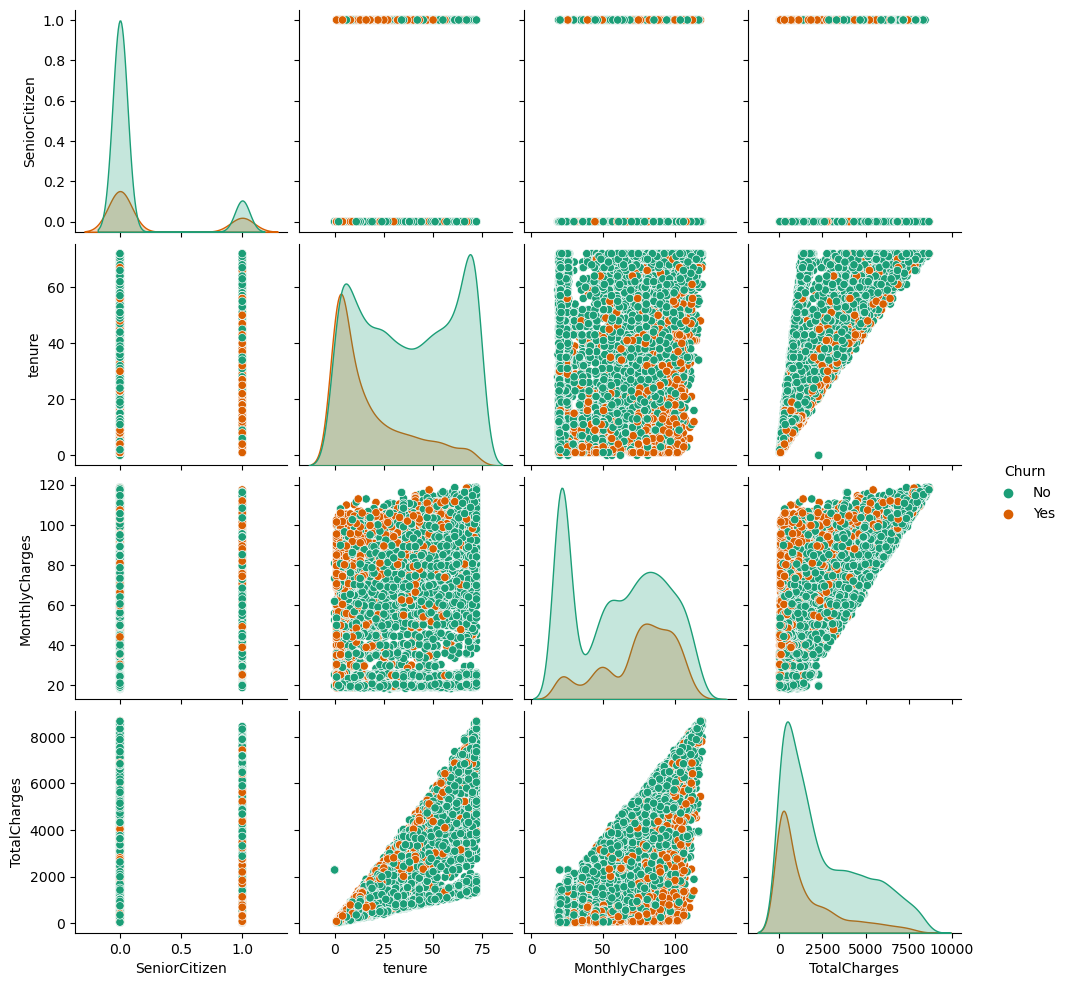

In [62]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

Findings--
1.The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots.
2.The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.
3.There are no outliers in any of the columns but let's plot box plot to identify the outliers.

Identifying the outliers

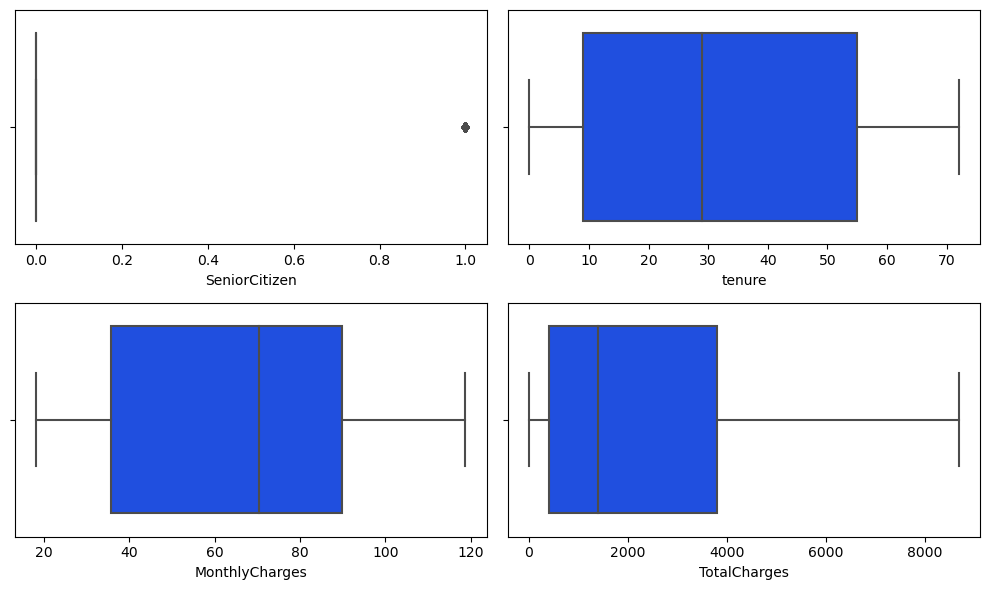

In [63]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Findings--Senior Citizen coloum has outliers it has categorical data so no need to remove outliers. Apart from this none of the columns have outliers.All the other columns are categorical columns.

Checking the distribution for numerical columns

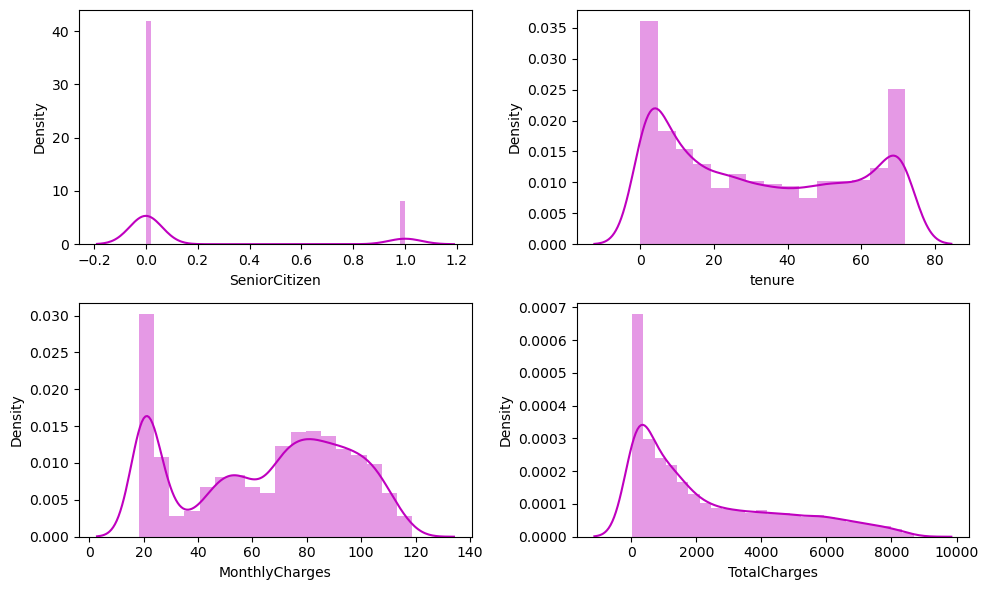

In [64]:
plt.figure(figsize=(10,6),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color="m")
        plt.xlabel(column,fontsize=10)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

Findings--
1.The data in SeniorCitizen is heavily skewed. 
2.Data in the column TotalCharges is skewed to right.
3.Tenure and MonthlyCharges do not have much skewness.

In [65]:
df.skew().sort_values()

MonthlyCharges   -0.224097
tenure            0.235542
TotalCharges      0.959088
SeniorCitizen     1.829987
dtype: float64

Observation--
1.SeniorCitizen and TotalCharges have skewness in the data.
2.SeniorCitizen is categorical no need to remove skewness. 
3.TotalCharges is continuous in nature,so use cube root method to remove skewness.

In [66]:
# Removing skewness using square root method
df["TotalCharges"] = np.cbrt(df["TotalCharges"])

In [67]:
# Checking skewness again
df.skew().sort_values()

MonthlyCharges   -0.224097
TotalCharges      0.010538
tenure            0.235542
SeniorCitizen     1.829987
dtype: float64

Encoding the categorical columns using Ordinal Encoding

In [68]:
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407,1.0
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,12.579230,0.0
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,19.454331,0.0
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391,0.0
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066,1.0


Converted the categorical columns into numerical columns using Ordinal Encoding method.

Statistical Summary of the DataSet

In [69]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000,7021.000000
mean,0.504344,0.162512,0.484546,0.300527,32.469449,0.902863,0.423159,0.870816,0.287566,0.345962,0.344965,0.291127,0.385558,0.389118,0.692636,0.592651,1.570716,64.851894,11.383708,0.264492
std,0.500017,0.368947,0.499797,0.458520,24.534965,0.296166,0.494095,0.737076,0.452660,0.475715,0.475391,0.454314,0.486761,0.487585,0.834163,0.491376,1.067530,30.069001,4.882227,0.441094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,2.659006,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.750000,7.435898,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,70.400000,11.214124,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.900000,15.607234,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,20.555116,1.000000


Checking Correlation

In [70]:
cor = df.corr()
cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001125,-0.001014,0.011081,0.006185,-0.006769,-0.007730,-0.001762,-0.016534,-0.013206,-0.001511,-0.008703,-0.007760,-0.009856,0.000811,-0.011350,0.016304,-0.013158,-0.000490,-0.008763
SeniorCitizen,-0.001125,1.000000,0.015553,-0.212115,0.015349,0.008909,0.142357,-0.031221,-0.039332,0.065950,0.058797,-0.061338,0.104765,0.119584,-0.143624,0.156196,-0.037320,0.219434,0.105061,0.151619
Partner,-0.001014,0.015553,1.000000,0.451659,0.377346,0.018728,0.139834,0.003667,0.141482,0.139620,0.151941,0.118311,0.122572,0.115284,0.293042,-0.015776,-0.152069,0.094301,0.340864,-0.149135
Dependents,0.011081,-0.212115,0.451659,1.000000,0.157603,-0.001092,-0.026324,0.046608,0.079776,0.022217,0.012498,0.062039,-0.018207,-0.041441,0.241912,-0.112220,-0.038185,-0.116191,0.082048,-0.163459
tenure,0.006185,0.015349,0.377346,0.157603,1.000000,0.009786,0.329742,-0.026847,0.325704,0.358586,0.358968,0.322694,0.277575,0.283932,0.670728,0.005053,-0.367827,0.245251,0.867732,-0.351508
PhoneService,-0.006769,0.008909,0.018728,-0.001092,0.009786,1.000000,0.280935,0.387549,-0.092316,-0.051619,-0.070554,-0.095761,-0.021788,-0.032179,0.003101,0.016824,-0.005304,0.248984,0.090071,0.011323
MultipleLines,-0.007730,0.142357,0.139834,-0.026324,0.329742,0.280935,1.000000,0.013614,0.096583,0.200690,0.199591,0.099037,0.255579,0.257170,0.105130,0.163249,-0.168684,0.489539,0.468107,0.041958
InternetService,-0.001762,-0.031221,0.003667,0.046608,-0.026847,0.387549,0.013614,1.000000,-0.392445,-0.313719,-0.305763,-0.388791,-0.241122,-0.248948,0.102456,-0.137056,0.082669,-0.320525,-0.203324,-0.047366
OnlineSecurity,-0.016534,-0.039332,0.141482,0.079776,0.325704,-0.092316,0.096583,-0.392445,1.000000,0.282802,0.274398,0.354110,0.174919,0.186119,0.244301,-0.004202,-0.148360,0.295548,0.407868,-0.170520
OnlineBackup,-0.013206,0.065950,0.139620,0.022217,0.358586,-0.051619,0.200690,-0.313719,0.282802,1.000000,0.302398,0.293209,0.280816,0.273188,0.153493,0.126421,-0.168938,0.440965,0.490578,-0.081092


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]),
 [Text(0, 0.5, 'gender'),
  Text(0, 1.5, 'SeniorCitizen'),
  Text(0, 2.5, 'Partner'),
  Text(0, 3.5, 'Dependents'),
  Text(0, 4.5, 'tenure'),
  Text(0, 5.5, 'PhoneService'),
  Text(0, 6.5, 'MultipleLines'),
  Text(0, 7.5, 'InternetService'),
  Text(0, 8.5, 'OnlineSecurity'),
  Text(0, 9.5, 'OnlineBackup'),
  Text(0, 10.5, 'DeviceProtection'),
  Text(0, 11.5, 'TechSupport'),
  Text(0, 12.5, 'StreamingTV'),
  Text(0, 13.5, 'StreamingMovies'),
  Text(0, 14.5, 'Contract'),
  Text(0, 15.5, 'PaperlessBilling'),
  Text(0, 16.5, 'PaymentMethod'),
  Text(0, 17.5, 'MonthlyCharges'),
  Text(0, 18.5, 'TotalCharges'),
  Text(0, 19.5, 'Churn')])

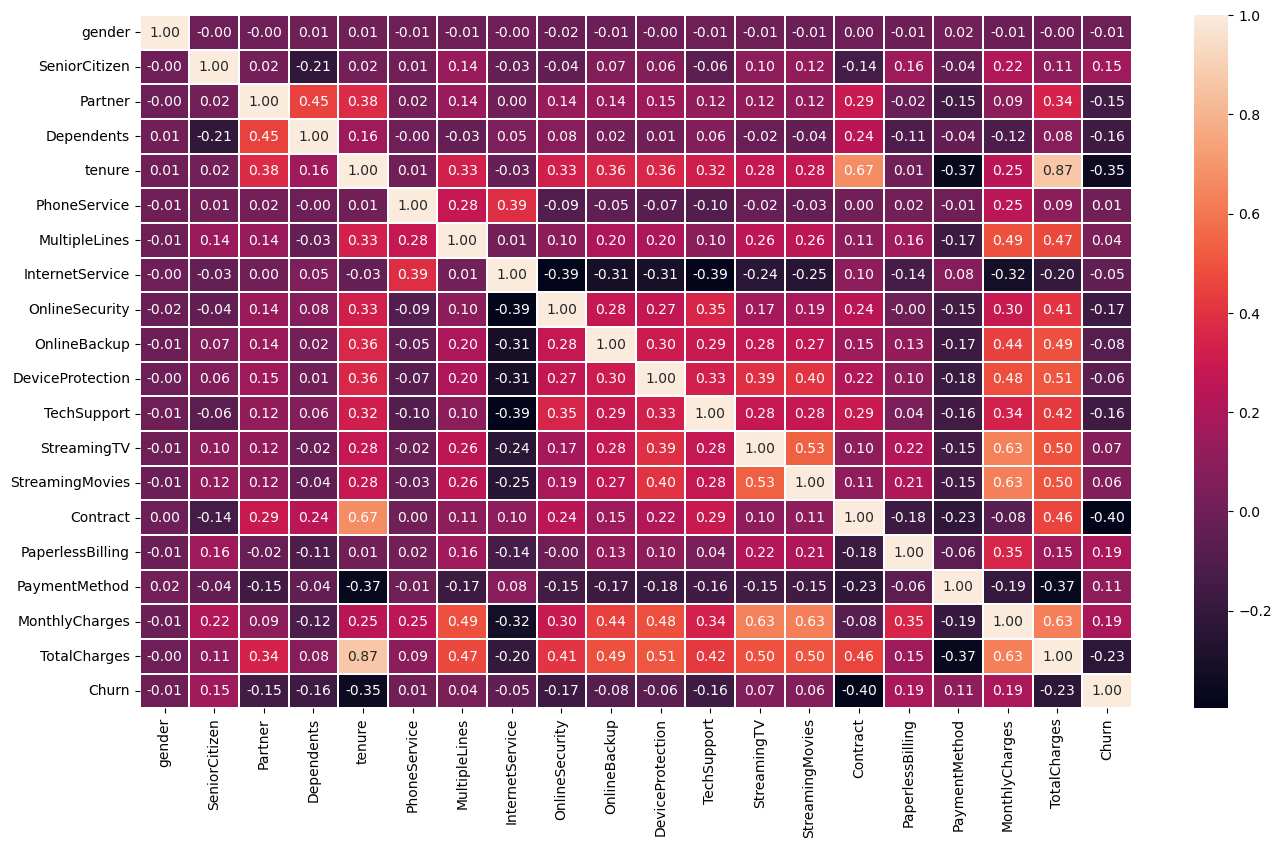

In [71]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='0.2f', annot = True)
plt.yticks(rotation=0)

Findings--
1.This heat mapcontains both positive and negative correlation.
2.There is no much positive correlation between the target and features.
3.The columns MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive correlation with the label Churn.
4.The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.
5.The column gender has very less correlation with the label.
6.The columns TotalCharges and tenure, Contract and tenure, TotalCharges and MonthlyCharges and many other columns have high correlation with each other. This leads to multicolllinearity issue, to overcome with this problem we will check VIF values and then we will drop the columns having VIF above 10.

In [72]:
cor['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.194508
PaperlessBilling    0.190891
SeniorCitizen       0.151619
PaymentMethod       0.106238
StreamingTV         0.065032
StreamingMovies     0.063192
MultipleLines       0.041958
PhoneService        0.011323
gender             -0.008763
InternetService    -0.047366
DeviceProtection   -0.064944
OnlineBackup       -0.081092
Partner            -0.149135
Dependents         -0.163459
TechSupport        -0.163937
OnlineSecurity     -0.170520
TotalCharges       -0.232394
tenure             -0.351508
Contract           -0.396531
Name: Churn, dtype: float64

Visualizing the correlation between label and features using bar plot

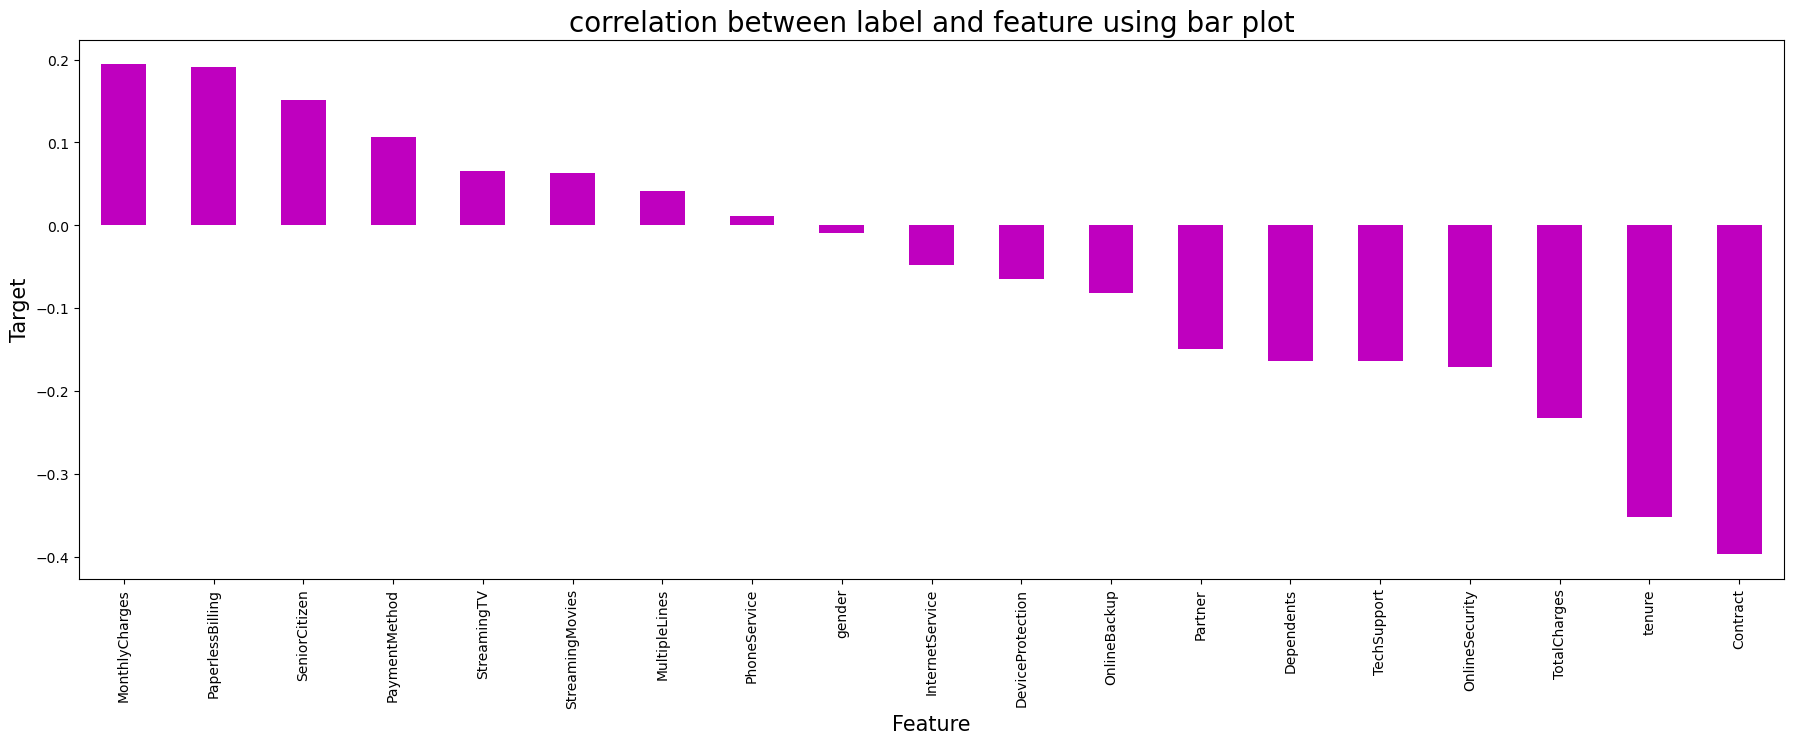

In [73]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

Findings--The features gender and PhoneService have very less correlation with the column.

Separating the feature and label into x and y

In [74]:
x = df.drop("Churn", axis=1)
y = df["Churn"]

In [75]:
x.shape

(7021, 19)

In [76]:
y.shape

(7021,)

In [77]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,3.102045
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,12.362766
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,4.764407
3,1.0,0,0.0,0.0,45,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,42.30,12.255516
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,5.332704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,84.80,12.579230
7039,0.0,0,1.0,1.0,72,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,103.20,19.454331
7040,0.0,0,1.0,1.0,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,7.023391
7041,1.0,1,1.0,0.0,4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,6.743066


In [78]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7021, dtype: float64

Feature Scaling using Standard Scalarization

In [79]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.008726,-0.440508,1.031400,-0.655475,-1.282728,-3.048725,-0.856493,-1.181531,-0.635326,1.374951,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,0.402156,-1.164135,-1.696409
1,0.991349,-0.440508,-0.969556,-0.655475,0.062387,0.328006,-0.856493,-1.181531,1.573996,-0.727299,1.377985,-0.640850,-0.792144,-0.798109,0.368496,-1.206190,1.338965,-0.262811,0.200549
2,0.991349,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.856493,-1.181531,1.573996,1.374951,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,1.338965,-0.365914,-1.355892
3,0.991349,-0.440508,-0.969556,-0.655475,0.510759,-3.048725,-0.856493,-1.181531,1.573996,-0.727299,1.377985,1.560427,-0.792144,-0.798109,0.368496,-1.206190,-1.471460,-0.750058,0.178580
4,-1.008726,-0.440508,-0.969556,-0.655475,-1.241967,0.328006,-0.856493,0.175278,-0.635326,-0.727299,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,0.402156,0.194503,-1.239483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,0.991349,-0.440508,1.031400,1.525611,-0.345224,0.328006,1.167552,-1.181531,1.573996,-0.727299,1.377985,1.560427,1.262397,1.252961,0.368496,0.829057,1.338965,0.663458,0.244890
7017,-1.008726,-0.440508,1.031400,1.525611,1.611307,0.328006,1.167552,0.175278,-0.635326,1.374951,1.377985,-0.640850,1.262397,1.252961,0.368496,0.829057,-0.534652,1.275428,1.653179
7018,-1.008726,-0.440508,1.031400,1.525611,-0.875118,-3.048725,-0.856493,-1.181531,1.573996,-0.727299,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,0.402156,-1.172450,-0.893164
7019,0.991349,2.270104,1.031400,-0.655475,-1.160445,0.328006,1.167552,0.175278,-0.635326,-0.727299,-0.725697,-0.640850,-0.792144,-0.798109,-0.830396,0.829057,1.338965,0.317562,-0.950585


The data have been scaled using standard scalarizaion method to overcome the data biasness

In [80]:
# Finding varience inflation factor in each scaled column
def calc_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [81]:
calc_vif(x)

,Features,VIF values
0,gender,1.001724
1,SeniorCitizen,1.149475
2,Partner,1.458943
3,Dependents,1.382974
4,tenure,12.327041
5,PhoneService,1.713697
6,MultipleLines,1.546647
7,InternetService,1.903750
8,OnlineSecurity,1.476568
9,OnlineBackup,1.479219


Feature TotalCharges and tenure have VIF value greater than 10 which means they have high correlation with the other features. We will drop one of the column.

In [82]:
# Dropping the feature Total Volume
x.drop("TotalCharges",axis=1, inplace=True)

In [83]:
calc_vif(x)

,Features,VIF values
0,gender,1.001709
1,SeniorCitizen,1.149421
2,Partner,1.456939
3,Dependents,1.381230
4,tenure,2.741540
5,PhoneService,1.713051
6,MultipleLines,1.536711
7,InternetService,1.896649
8,OnlineSecurity,1.463918
9,OnlineBackup,1.468302


Columns have VIF less than 10 which means the data is free from multicollinearity problem.

In [84]:
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

In [85]:
x.shape

(7021, 18)

SMOTE

In [86]:
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [87]:
y.value_counts()

0.0    5164
1.0    5164
Name: Churn, dtype: int64

In [88]:
x.shape

(10328, 18)

In [89]:
y.shape

(10328,)

Machine Learning

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier()

In [91]:
#For Test size .30
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8647950951919974  on Random_state  15


In [92]:
# For Test size .20
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8741529525653436  on Random_state  91


Findings--The best random state as 91 for test size 0.2.

Checking important feature for bar graph

,Importance
Features,
tenure,0.195
MonthlyCharges,0.187
Contract,0.176
PaymentMethod,0.096
InternetService,0.055
PaperlessBilling,0.033
OnlineSecurity,0.031
TechSupport,0.029
gender,0.029


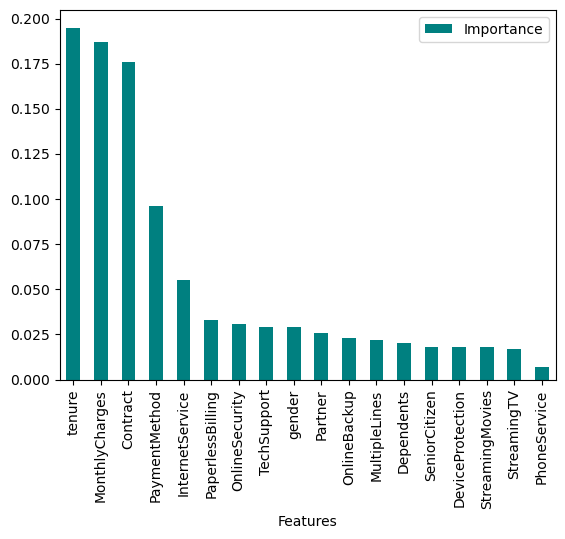

In [93]:
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

This bar plot shows us the importance of the features using random forest algorithm on predicting our Target variable.

Creating train_test split

In [94]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [95]:
# function to run all the classifiers

def classifier(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=29)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

Logistic Regression

In [96]:
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 76.81510164569217

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.75      0.76      1034
         1.0       0.76      0.79      0.77      1032

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Cross Validation Score: 77.29495181996536

Accuracy Score - Cross Validation Score is -0.47985017427319576


Naive Bayes

In [97]:
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 76.5730880929332

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.71      0.75      1034
         1.0       0.74      0.82      0.78      1032

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Cross Validation Score: 76.54938131256901

Accuracy Score - Cross Validation Score is 0.02370678036419349


SVC Classifier

In [98]:
model = SVC(kernel='rbf')
classifier(model, x, y)

Accuracy Score: 80.92933204259438

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.78      0.80      1034
         1.0       0.79      0.84      0.82      1032

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

Cross Validation Score: 80.2289764643285

Accuracy Score - Cross Validation Score is 0.700355578265885


In [99]:
model = SVC(kernel='linear')
classifier(model, x, y)

Accuracy Score: 77.25072604065828

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      1034
         1.0       0.75      0.82      0.78      1032

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066

Cross Validation Score: 76.7333022368381

Accuracy Score - Cross Validation Score is 0.5174238038201793


In [100]:
model = SVC(kernel='poly')
classifier(model, x, y)

Accuracy Score: 79.04162633107454

Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.73      0.78      1034
         1.0       0.76      0.85      0.80      1032

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066

Cross Validation Score: 78.65052305398835

Accuracy Score - Cross Validation Score is 0.391103277086188


Decision Tree Classifier

In [101]:
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 79.96127783155856

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.80      0.80      1034
         1.0       0.80      0.80      0.80      1032

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066

Cross Validation Score: 77.89596112781831

Accuracy Score - Cross Validation Score is 2.065316703740251


KNeighbors Classifier

In [102]:
model = KNeighborsClassifier()
classifier(model, x, y)

Accuracy Score: 79.18683446272992

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.68      0.77      1034
         1.0       0.74      0.90      0.81      1032

    accuracy                           0.79      2066
   macro avg       0.81      0.79      0.79      2066
weighted avg       0.81      0.79      0.79      2066

Cross Validation Score: 78.92157823307838

Accuracy Score - Cross Validation Score is 0.2652562296515413


SGD Classifier

In [103]:
model = SGDClassifier()
classifier(model, x, y)

Accuracy Score: 76.81510164569217

Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.72      0.76      1034
         1.0       0.74      0.82      0.78      1032

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066

Cross Validation Score: 75.90068185707018

Accuracy Score - Cross Validation Score is 0.9144197886219843


Random Forest Classifier

In [104]:
model = RandomForestClassifier()
classifier(model, x, y)

Accuracy Score: 85.96321393998065

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.85      0.86      1034
         1.0       0.85      0.87      0.86      1032

    accuracy                           0.86      2066
   macro avg       0.86      0.86      0.86      2066
weighted avg       0.86      0.86      0.86      2066

Cross Validation Score: 85.30315566921143

Accuracy Score - Cross Validation Score is 0.6600582707692126


In [105]:
model = RandomForestClassifier(random_state=29)
classifier(model, x, y)

Accuracy Score: 86.49564375605033

Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1034
         1.0       0.86      0.87      0.87      1032

    accuracy                           0.86      2066
   macro avg       0.87      0.86      0.86      2066
weighted avg       0.87      0.86      0.86      2066

Cross Validation Score: 85.1385583258522

Accuracy Score - Cross Validation Score is 1.3570854301981257


ExtraTrees Classifier

In [106]:
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 86.93126815101647

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.86      0.87      1034
         1.0       0.86      0.88      0.87      1032

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066

Cross Validation Score: 86.17430601295271

Accuracy Score - Cross Validation Score is 0.7569621380637557


In [107]:
model = ExtraTreesClassifier(random_state=29)
classifier(model, x, y)

Accuracy Score: 86.83446272991287

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.87      1034
         1.0       0.86      0.88      0.87      1032

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066

Cross Validation Score: 86.26144495568751

Accuracy Score - Cross Validation Score is 0.573017774225363


AdaBoost Classifier

In [108]:
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 80.68731848983543

Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.80      1034
         1.0       0.79      0.83      0.81      1032

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066

Cross Validation Score: 80.71330828424698

Accuracy Score - Cross Validation Score is -0.0259897944115437


Gradient Boosting Classifier

In [109]:
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 85.28557599225557

Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1034
         1.0       0.83      0.88      0.86      1032

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066

Cross Validation Score: 83.75388921053187

Accuracy Score - Cross Validation Score is 1.5316867817237068


Findings-- ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

Hyper Parameter Tuning

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=29)

In [111]:
x_test.shape

(2066, 18)

In [112]:
y_test.shape

(2066,)

In [113]:
x_train.shape

(8262, 18)

In [114]:
y_train.shape

(8262,)

In [115]:
# creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [None, 29],
              'n_estimators': [100, 200, 300]}

In [116]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [117]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [None, 29]})

In [118]:
# printing best parameters found by GridSearchCV
GCV.best_params_      

{'criterion': 'gini',
 'max_features': 'sqrt',
 'n_estimators': 300,
 'n_jobs': 1,
 'random_state': None}

In [119]:
final_modelc = ExtraTreesClassifier(criterion = 'entropy', max_features = 'auto', n_estimators = 200, n_jobs = -2 , random_state = None)  

In [120]:
# final fit
final_fitc = final_modelc.fit(x_train,y_train)   

In [121]:
# predicting with best parameters
final_predc = final_modelc.predict(x_test)   

In [122]:
 # checking accuracy score
best_acc_score = (accuracy_score(y_test, final_predc))*100   
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  86.64085188770572


Successfully performed the Hyper Parameter Tuning on the Final Model.

In [123]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 86.30015774830122


We got final accuracy score of 86.64% and Cross Validation Score of 86.30% which is good

In [124]:
# Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.85      0.86      1034
         1.0       0.85      0.88      0.87      1032

    accuracy                           0.87      2066
   macro avg       0.87      0.87      0.87      2066
weighted avg       0.87      0.87      0.87      2066



Confusion Matrix

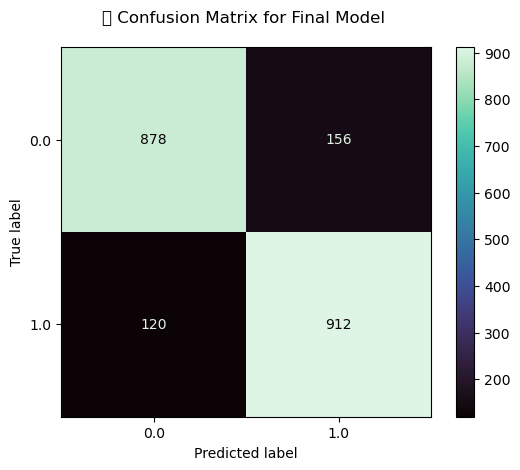

In [125]:
plt.style.use('default')
class_names = df.columns
metrics.plot_confusion_matrix(final_modelc, x_test, y_test, cmap='mako')
plt.title('\t Confusion Matrix for Final Model \n')
plt.show()

Confusion matrix hepls to understand the number of times we got the correct outputs and the number of times ML model missed to provide the correct prediction (depicting in the black boxes).

AUC ROC Curve

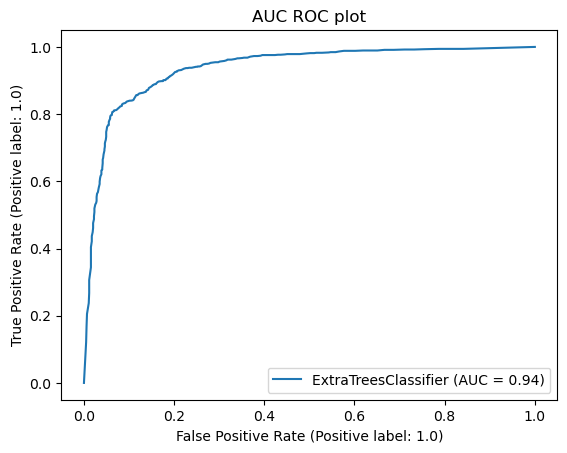

In [126]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_modelc, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

We got final accuracy score of 86.64% and Cross Validation Score of 86.30% and AUC scoreis 0.94 which is good

Saving the model

In [127]:
# pickeling or serialization of a file
import pickle
filename = 'Customer_Churn_Analysis_Final_Model.pkl'
pickle.dump(final_modelc, open(filename, 'wb'))

Prediction Conclusion

In [128]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,1.0,0.0
1,1.0,1.0
2,0.0,0.0
3,0.0,0.0
4,1.0,0.0
...,...,...
2061,0.0,0.0
2062,1.0,1.0
2063,0.0,0.0
2064,1.0,1.0


Predicted the "Churn" using the final Model.

In [129]:
df_comparisonc.to_csv('Customer_Churn_Analysis_Prediction.csv')

Saved the file as a csv

Thank You